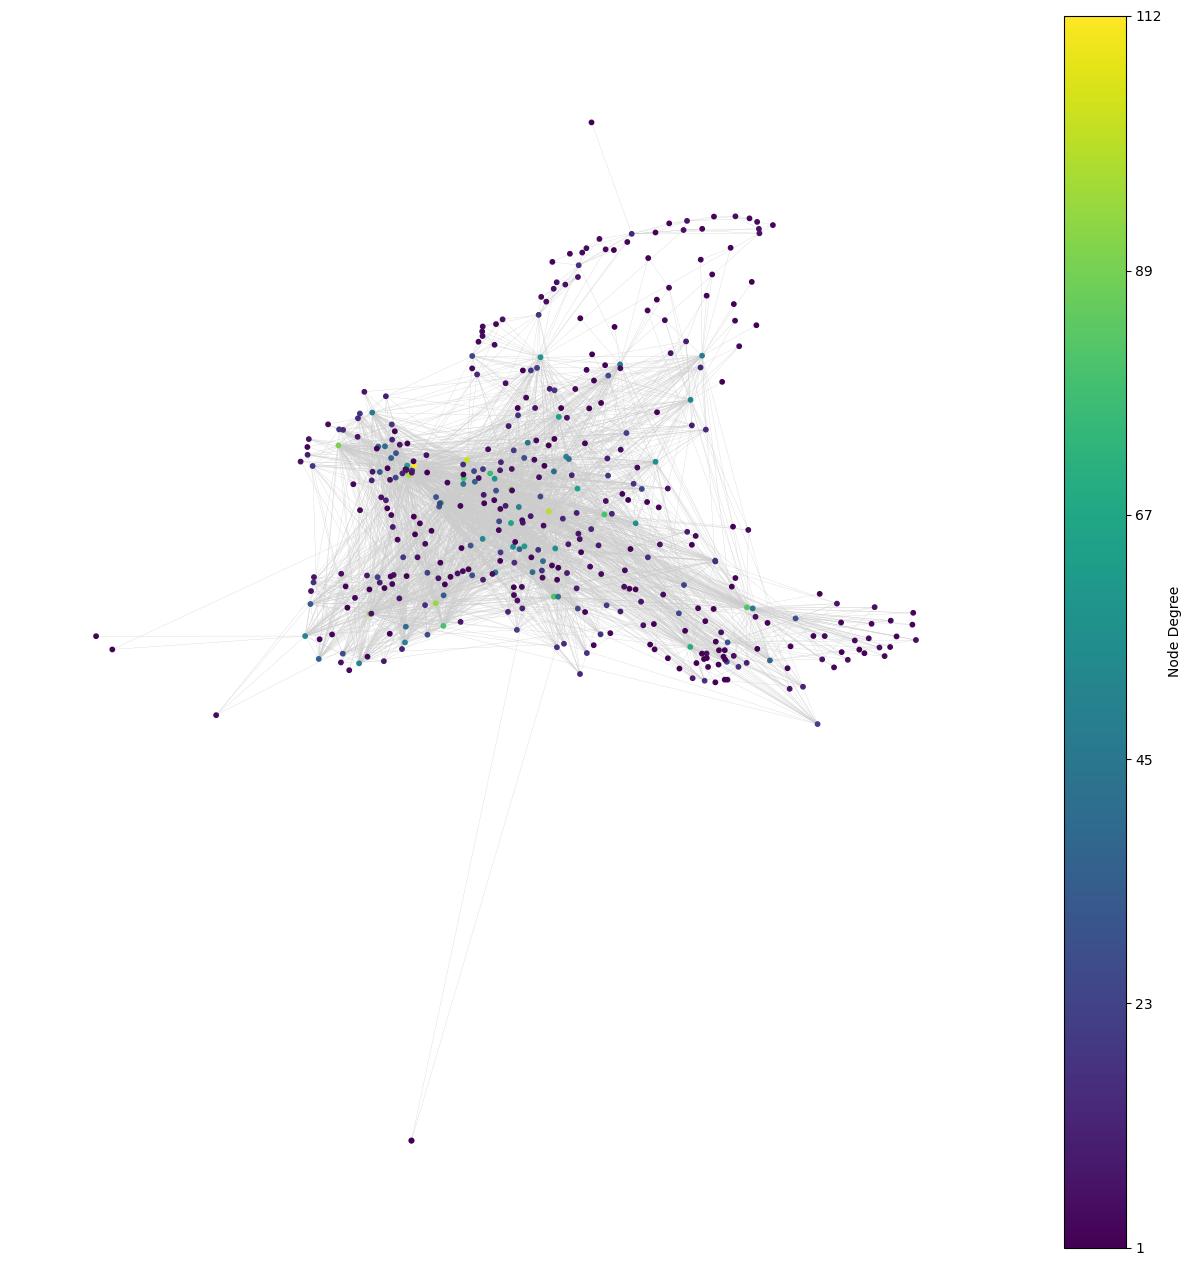

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Manually parse the edgelist file and create the graph with weights

G = nx.Graph()
with open("EU_Air//EUAirTransportation_multiplex.edges", "r") as f:
    for line in f:
        parts = line.strip().split()
        # Use the first two columns as nodes, last column as weight
        node1, node2, weight = parts[1], parts[2], float(parts[3])
        G.add_edge(node1, node2, weight=weight)

node_pos = {}
with open("EU_Air//EUAirTransportation_nodes.txt", "r") as f:
    next(f)  # Skip header line
    for line in f:
        parts = line.strip().split()
        node_id = parts[0]
        lon = float(parts[-2])
        lat = float(parts[-1])
        node_pos[node_id] = (lon, lat)


# Visualization with node colors based on degree

fig, ax = plt.subplots(figsize=(16, 16))
degrees = np.array([G.degree(n) for n in G.nodes()])
colors = degrees
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=degrees.min(), vmax=degrees.max())
nodes = nx.draw_networkx(
    G,
    pos=node_pos,
    with_labels=False,
    node_size=10,
    node_color=colors,
    cmap=cmap,
    edge_color='#cccccc',
    width=0.2,
    ax=ax
)
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Node Degree', orientation='vertical')
cbar.set_ticks(np.linspace(degrees.min(), degrees.max(), num=6, dtype=int))
plt.show()


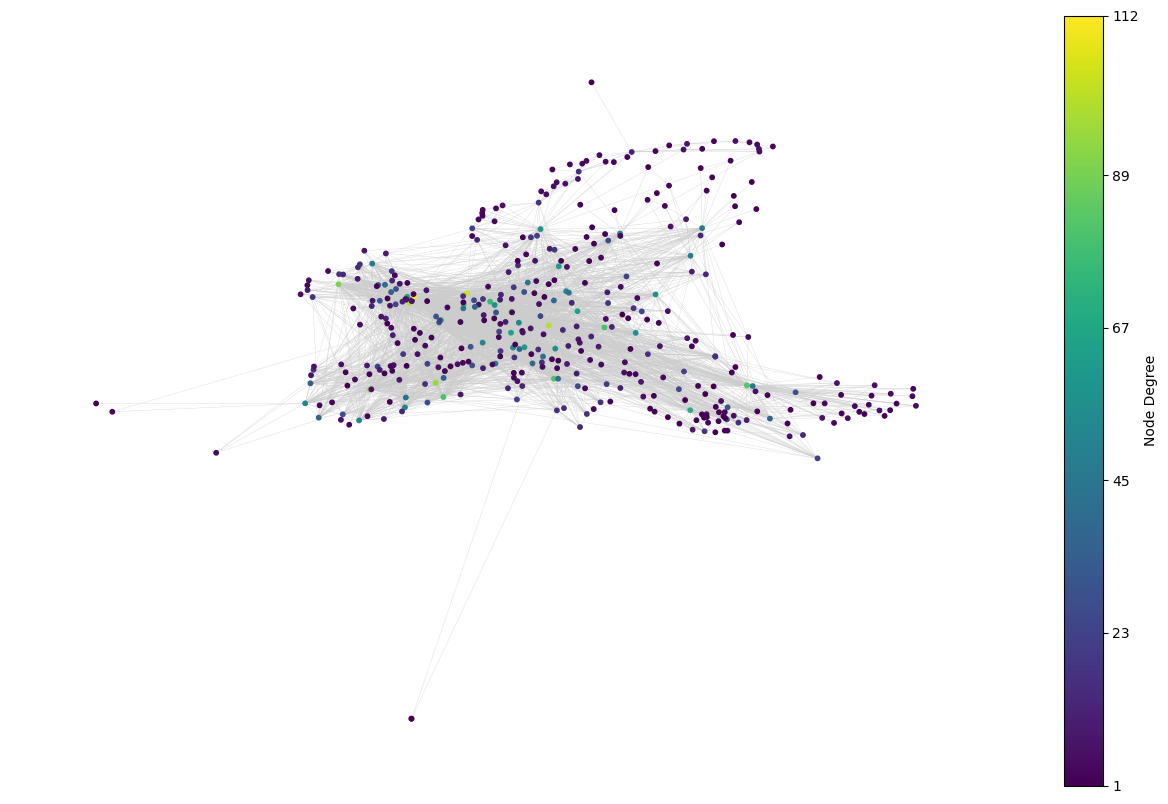

In [5]:
# Draw network using real-world coordinates from EUAirTransportation_nodes.txt
node_pos = {}
with open("EU_Air//EUAirTransportation_nodes.txt", "r") as f:
    next(f)  # Skip header line
    for line in f:
        parts = line.strip().split()
        node_id = parts[0]
        lon = float(parts[-2])
        lat = float(parts[-1])
        node_pos[node_id] = (lon, lat)

fig, ax = plt.subplots(figsize=(16, 10))
degrees = np.array([G.degree(n) for n in G.nodes()])
colors = degrees
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=degrees.min(), vmax=degrees.max())
nodes = nx.draw_networkx(
    G,
    pos=node_pos,
    with_labels=False,
    node_size=10,
    node_color=colors,
    cmap=cmap,
    edge_color='#cccccc',
    width=0.2,
    ax=ax
)
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Node Degree', orientation='vertical')
cbar.set_ticks(np.linspace(degrees.min(), degrees.max(), num=6, dtype=int))
plt.show()


C:\Users\bogia\AppData\Local\Temp\ipykernel_45532\393460095.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(layers))


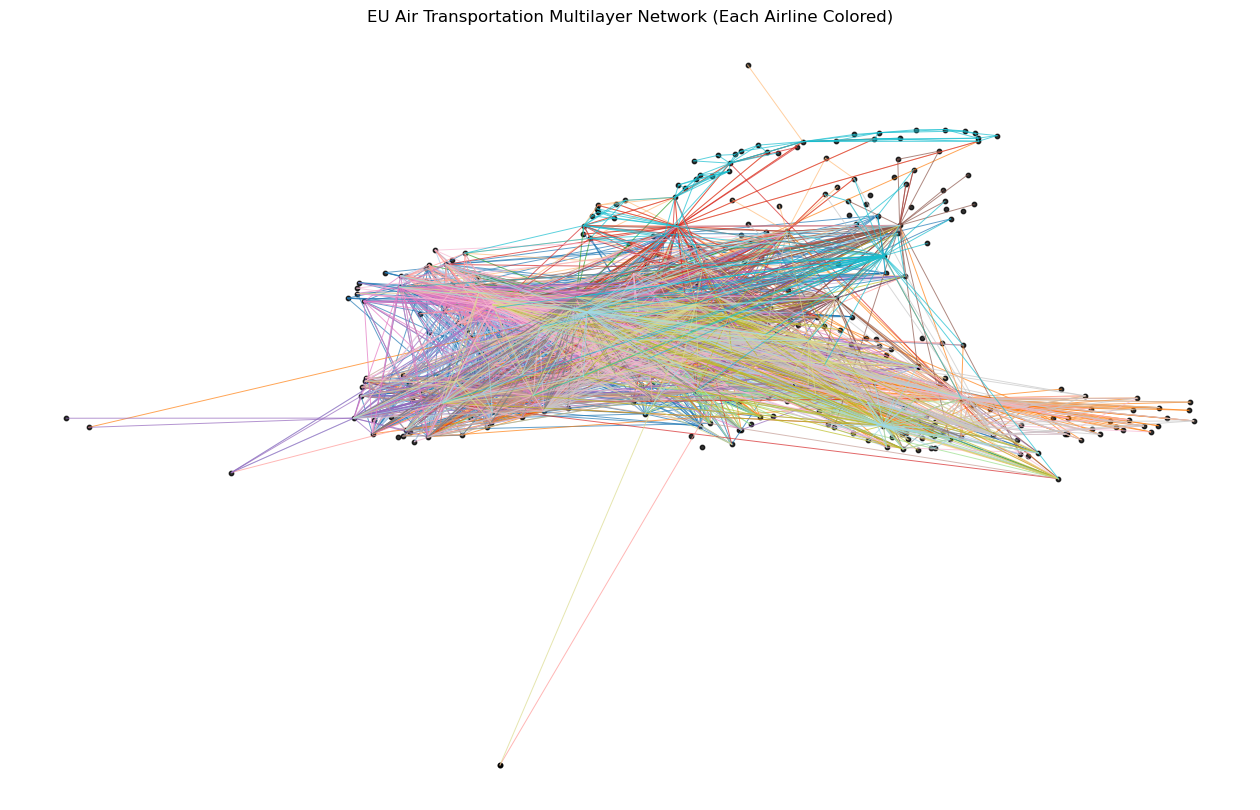

In [6]:
# Visualize multilayer network: color each layer (airline) differently
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Read node positions
node_pos = {}
with open("EU_Air//EUAirTransportation_nodes.txt", "r") as f:
    next(f)
    for line in f:
        parts = line.strip().split()
        node_id = parts[0]
        lon = float(parts[-2])
        lat = float(parts[-1])
        node_pos[node_id] = (lon, lat)

# Parse edges by layer
layer_edges = {}
with open("EU_Air//EUAirTransportation_multiplex.edges", "r") as f:
    for line in f:
        parts = line.strip().split()
        layer = parts[0]
        node1 = parts[1]
        node2 = parts[2]
        layer_edges.setdefault(layer, []).append((node1, node2))

# Assign a color to each layer
layers = sorted(layer_edges.keys(), key=int)
colors = cm.get_cmap('tab20', len(layers))

fig, ax = plt.subplots(figsize=(16, 10))
for i, layer in enumerate(layers):
    edges = layer_edges[layer]
    for node1, node2 in edges:
        x = [node_pos[node1][0], node_pos[node2][0]]
        y = [node_pos[node1][1], node_pos[node2][1]]
        ax.plot(x, y, color=colors(i), linewidth=0.7, alpha=0.7)

ax.scatter(
    [pos[0] for pos in node_pos.values()],
    [pos[1] for pos in node_pos.values()],
    s=10, c='black', alpha=0.8
)
ax.axis('off')
plt.title('EU Air Transportation Multilayer Network (Each Airline Colored)')
plt.show()
